In [1]:
import os
import sys
sys.path.append('../../')
import tqdm
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
from libs.utils import filter_glucose_by_range, filter_noisy_data


In [2]:
data_root = "/mnt/data2/mtseng/dataset/SeNSE/TCH_processed/beat"
subject_id = 'c1s01'

In [3]:
df = pd.read_pickle(os.path.join(data_root, f"{subject_id}.pkl"))
df = filter_glucose_by_range(df)
df = filter_noisy_data(df)
print(df.head())
print(df.shape)

Glucose Level Filtering (remove beats with glucose value outside 40-180 mg/dl ):
 - Original count:  893806
 - Filtered count:  831519
 - Availability ratio: 0.930
Filter out noisy data (HRConfidence < 100 or ECGNoise > 0.001):
 - Original:  831519
 - Filtered:  693147
 - Availability Ratio: 0.834
                                                   Time  \
3642  [2022-06-08T16:22:57.417000000, 2022-06-08T16:...   
3643  [2022-06-08T16:22:58.129000000, 2022-06-08T16:...   
3644  [2022-06-08T16:22:58.857000000, 2022-06-08T16:...   
3645  [2022-06-08T16:22:59.581000000, 2022-06-08T16:...   
3646  [2022-06-08T16:23:00.289000000, 2022-06-08T16:...   

                                            EcgWaveform  \
3642  [2025, 2024, 2023, 2024, 2025, 2026, 2027, 202...   
3643  [2022, 2020, 2019, 2018, 2019, 2020, 2020, 201...   
3644  [2024, 2024, 2025, 2026, 2027, 2027, 2027, 202...   
3645  [2002, 2001, 2001, 2002, 2002, 2004, 2004, 200...   
3646  [2004, 2003, 2005, 2004, 2003, 2004, 2004, 20

In [4]:
print(df['glucose'].describe())

count    693147.000000
mean        109.182081
std          28.013387
min          40.000000
25%          89.000000
50%         107.000000
75%         126.000000
max         180.000000
Name: glucose, dtype: float64


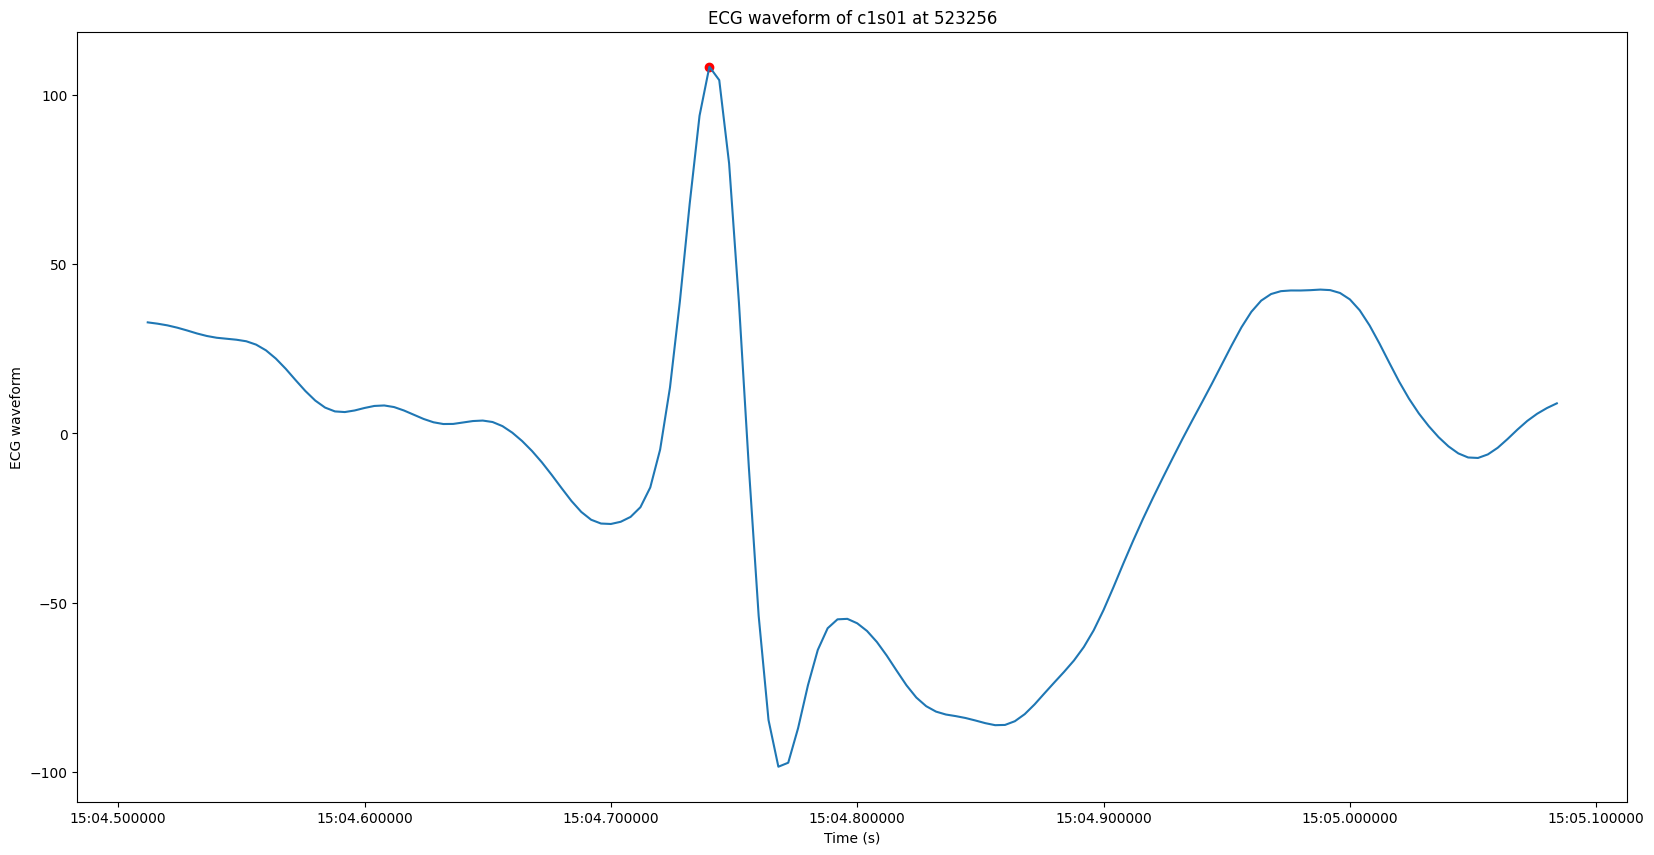

In [5]:
# plot the cleaned signals
random_idx = np.random.choice(df.index)
fs = 250

T = df['Time'][random_idx]
T = pd.to_datetime(T)


ecg = df['EcgWaveform'][random_idx]
ecg_clean = nk.ecg_clean(ecg, sampling_rate=fs)
r_peak = df['r_peak'][random_idx]

plt.figure(figsize=(20, 10))
plt.plot(T, ecg_clean, label="ECG")
plt.scatter(T[r_peak], ecg_clean[r_peak], c='r', label="R peak")
plt.title(f"ECG waveform of {subject_id} at {random_idx}")
plt.xlabel("Time (s)")
plt.ylabel("ECG waveform")
plt.show()